Wikipediaの記事を以下のフォーマットで書き出したファイル[jawiki-country.json.gz](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/jawiki-country.json.gz)がある．

* 1行に1記事の情報がJSON形式で格納される
* 各行には記事名が"title"キーに，記事本文が"text"キーの辞書オブジェクトに格納され，そのオブジェクトがJSON形式で書き出される
* ファイル全体はgzipで圧縮される

以下の処理を行うプログラムを作成せよ．

In [1]:
import gzip
import shutil
import urllib.request

url = "http://www.cl.ecei.tohoku.ac.jp/nlp100/data/jawiki-country.json.gz"

with urllib.request.urlopen(url) as response, open("jawiki-country.json", "wb") as json:
    with gzip.GzipFile(fileobj=response) as uncompressed:
        shutil.copyfileobj(uncompressed, json)

---

### 20. JSONデータの読み込み
Wikipedia記事のJSONファイルを読み込み，「イギリス」に関する記事本文を表示せよ．問題21-29では，ここで抽出した記事本文に対して実行せよ．

In [2]:
import json
import re

def jawiki_england():
    text = None
    with open("jawiki-country.json", "rt") as jawiki:
        text = [line for line in [json.loads(line) for line in list(jawiki)]
            if re.match('イギリス', line["title"])][0]["text"]
    return text

def head(multiline_text, n=10):
    return '\n'.join(multiline_text.split('\n')[:n])

print(head(jawiki_england()))

{{redirect|UK}}
{{基礎情報 国
|略名 = イギリス
|日本語国名 = グレートブリテン及び北アイルランド連合王国
|公式国名 = {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br/>
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）<br/>
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）<br/>
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）<br/>
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）<br/>
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）<br/>


### 21. カテゴリ名を含む行を抽出
記事中でカテゴリ名を宣言している行を抽出せよ．



In [3]:
[line for line in jawiki_england().split('\n') if re.match(r'^.*Category', line)]

['[[Category:イギリス|*]]',
 '[[Category:英連邦王国|*]]',
 '[[Category:G8加盟国]]',
 '[[Category:欧州連合加盟国]]',
 '[[Category:海洋国家]]',
 '[[Category:君主国]]',
 '[[Category:島国|くれいとふりてん]]',
 '[[Category:1801年に設立された州・地域]]']

### 22. カテゴリ名の抽出
記事のカテゴリ名を（行単位ではなく名前で）抽出せよ．

In [4]:
[re.match(r'^.*Category:([^|]+)|', line).group(1) for line in
    [line for line in jawiki_england().split('\n') if re.match(r'^.*Category', line)]]

['イギリス',
 '英連邦王国',
 'G8加盟国]]',
 '欧州連合加盟国]]',
 '海洋国家]]',
 '君主国]]',
 '島国',
 '1801年に設立された州・地域]]']

### 23. セクション構造
記事中に含まれるセクション名とそのレベル（例えば"== セクション名 =="なら1）を表示せよ．

In [5]:
print('\n'.join(["%d %s" % (len(matched.group(1)), matched.group(2)) for matched in
    [re.match(r'^(=+)([^=]+)=', line) for line in jawiki_england().split('\n') if re.match(r'^=+', line)]]))

2 国名
2 歴史
2 地理
3 気候
2 政治
2 外交と軍事
2 地方行政区分
3 主要都市
2 科学技術
2 経済
3 鉱業
3 農業
3 貿易
3 通貨
3 企業
2 交通
3 道路
3 鉄道
3 海運
3 航空
2 通信
2 国民
3 言語
3 宗教
3  婚姻 
3 教育
2 文化
3 食文化
3 文学
3  哲学 
3 音楽
4 イギリスのポピュラー音楽
3 映画
3 コメディ
3 国花
3 世界遺産
3 祝祭日
2 スポーツ
3 サッカー
3 競馬
3 モータースポーツ
2 脚注
2 関連項目
2 外部リンク


### 24. ファイル参照の抽出
記事から参照されているメディアファイルをすべて抜き出せ．

In [6]:
[re.match(r'^.*File:([^|]+)|', line).group(1)
    for line in jawiki_england().split('\n') if re.match(r'^.*File', line)]

['Battle of Waterloo 1815.PNG',
 'The British Empire.png',
 'Uk topo en.jpg',
 'BenNevis2005.jpg',
 'Elizabeth II greets NASA GSFC employees, May 8, 2007 edit.jpg',
 'Palace of Westminster, London - Feb 2007.jpg',
 'David Cameron and Barack Obama at the G20 Summit in Toronto.jpg',
 'Soldiers Trooping the Colour, 16th June 2007.jpg',
 'Scotland Parliament Holyrood.jpg',
 'London.bankofengland.arp.jpg',
 'City of London skyline from London City Hall - Oct 2008.jpg',
 'Oil platform in the North SeaPros.jpg',
 'Eurostar at St Pancras Jan 2008.jpg',
 'Heathrow T5.jpg',
 'Anglospeak.svg']

### 25. テンプレートの抽出
記事中に含まれる「基礎情報」テンプレートのフィールド名と値を抽出し，辞書オブジェクトとして格納せよ．

In [7]:
infopattern = re.compile(r'.+\{\{基礎情報\s国(.+)\}\}', re.DOTALL)
keyvaluepattern = re.compile('\|(.+)\s+=\s+(.+)')
linebreakpattern = re.compile('<br/>\n')

info = infopattern.match(jawiki_england()).group(1)
dict([keyvaluepattern.match(line).group(1, 2)
      for line in linebreakpattern.sub('', info).split('\n')
      if keyvaluepattern.match(line)])

{'GDP/人': '36,727<ref name="imf-statistics-gdp" />',
 'GDP値': '2兆3162億<ref name="imf-statistics-gdp" />',
 'GDP値MER': '2兆4337億<ref name="imf-statistics-gdp" />',
 'GDP値元': '1兆5478億<ref name="imf-statistics-gdp">[http://www.imf.org/external/pubs/ft/weo/2012/02/weodata/weorept.aspx?pr.x=70&pr.y=13&sy=2010&ey=2012&scsm=1&ssd=1&sort=country&ds=.&br=1&c=112&s=NGDP%2CNGDPD%2CPPPGDP%2CPPPPC&grp=0&a= IMF>Data and Statistics>World Economic Outlook Databases>By Countrise>United Kingdom]</ref>',
 'GDP統計年': '2012',
 'GDP統計年MER': '2012',
 'GDP統計年元': '2012',
 'GDP順位': '6',
 'GDP順位MER': '5',
 'ISO 3166-1': 'GB / GBR',
 'ccTLD': '[[.uk]] / [[.gb]]<ref>使用は.ukに比べ圧倒的少数。</ref>',
 '人口値': '63,181,775<ref>[http://esa.un.org/unpd/wpp/Excel-Data/population.htm United Nations Department of Economic and Social Affairs>Population Division>Data>Population>Total Population]</ref>',
 '人口大きさ': '1 E7',
 '人口密度値': '246',
 '人口統計年': '2011',
 '人口順位': '22',
 '位置画像': 'Location_UK_EU_Europe_001.svg',
 '元首等氏名': '[[エリザベス2世]]',


### 26. 強調マークアップの除去
25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: [マークアップ早見表](http://ja.wikipedia.org/wiki/Help:%E6%97%A9%E8%A6%8B%E8%A1%A8)）．

In [8]:
infopattern = re.compile(r'.+\{\{基礎情報\s国(.+)\}\}', re.DOTALL)
keyvaluepattern = re.compile('\|(.+)\s+=\s+(.+)')
linebreakpattern = re.compile('<br/>\n')

info = infopattern.match(jawiki_england()).group(1)

dict([(key, re.sub(r"'{1,3}", '', value))
      for key, value in
      [keyvaluepattern.match(line).group(1, 2)
          for line in linebreakpattern.sub('', info).split('\n')
          if keyvaluepattern.match(line)]])

{'GDP/人': '36,727<ref name="imf-statistics-gdp" />',
 'GDP値': '2兆3162億<ref name="imf-statistics-gdp" />',
 'GDP値MER': '2兆4337億<ref name="imf-statistics-gdp" />',
 'GDP値元': '1兆5478億<ref name="imf-statistics-gdp">[http://www.imf.org/external/pubs/ft/weo/2012/02/weodata/weorept.aspx?pr.x=70&pr.y=13&sy=2010&ey=2012&scsm=1&ssd=1&sort=country&ds=.&br=1&c=112&s=NGDP%2CNGDPD%2CPPPGDP%2CPPPPC&grp=0&a= IMF>Data and Statistics>World Economic Outlook Databases>By Countrise>United Kingdom]</ref>',
 'GDP統計年': '2012',
 'GDP統計年MER': '2012',
 'GDP統計年元': '2012',
 'GDP順位': '6',
 'GDP順位MER': '5',
 'ISO 3166-1': 'GB / GBR',
 'ccTLD': '[[.uk]] / [[.gb]]<ref>使用は.ukに比べ圧倒的少数。</ref>',
 '人口値': '63,181,775<ref>[http://esa.un.org/unpd/wpp/Excel-Data/population.htm United Nations Department of Economic and Social Affairs>Population Division>Data>Population>Total Population]</ref>',
 '人口大きさ': '1 E7',
 '人口密度値': '246',
 '人口統計年': '2011',
 '人口順位': '22',
 '位置画像': 'Location_UK_EU_Europe_001.svg',
 '元首等氏名': '[[エリザベス2世]]',


### 27. 内部リンクの除去
26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: マークアップ早見表）．

In [9]:

def normalize(value):
    return re.sub('\[\[(.*?)\]\]', r'\1', re.sub(r"'{1,3}", '', value))

def basic_info(normalizer):
    infopattern = re.compile(r'.+\{\{基礎情報\s国(.+)\}\}', re.DOTALL)
    keyvaluepattern = re.compile('\|(.+)\s+=\s+(.+)')
    linebreakpattern = re.compile('<br/>\n')

    info = infopattern.match(jawiki_england()).group(1)
    
    return dict([(key, normalizer(value))
          for key, value in
          [keyvaluepattern.match(line).group(1, 2)
              for line in linebreakpattern.sub('', info).split('\n')
              if keyvaluepattern.match(line)]])

basic_info(normalize)

{'GDP/人': '36,727<ref name="imf-statistics-gdp" />',
 'GDP値': '2兆3162億<ref name="imf-statistics-gdp" />',
 'GDP値MER': '2兆4337億<ref name="imf-statistics-gdp" />',
 'GDP値元': '1兆5478億<ref name="imf-statistics-gdp">[http://www.imf.org/external/pubs/ft/weo/2012/02/weodata/weorept.aspx?pr.x=70&pr.y=13&sy=2010&ey=2012&scsm=1&ssd=1&sort=country&ds=.&br=1&c=112&s=NGDP%2CNGDPD%2CPPPGDP%2CPPPPC&grp=0&a= IMF>Data and Statistics>World Economic Outlook Databases>By Countrise>United Kingdom]</ref>',
 'GDP統計年': '2012',
 'GDP統計年MER': '2012',
 'GDP統計年元': '2012',
 'GDP順位': '6',
 'GDP順位MER': '5',
 'ISO 3166-1': 'GB / GBR',
 'ccTLD': '.uk / .gb<ref>使用は.ukに比べ圧倒的少数。</ref>',
 '人口値': '63,181,775<ref>[http://esa.un.org/unpd/wpp/Excel-Data/population.htm United Nations Department of Economic and Social Affairs>Population Division>Data>Population>Total Population]</ref>',
 '人口大きさ': '1 E7',
 '人口密度値': '246',
 '人口統計年': '2011',
 '人口順位': '22',
 '位置画像': 'Location_UK_EU_Europe_001.svg',
 '元首等氏名': 'エリザベス2世',
 '元首等肩書': 'イ

### 28. MediaWikiマークアップの除去
27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．

### 29. 国旗画像のURLを取得する
テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: [MediaWiki API](http://www.mediawiki.org/wiki/API:Main_page/ja)の[imageinfo](http://www.mediawiki.org/wiki/API:Properties/ja#imageinfo_.2F_ii)を呼び出して，ファイル参照をURLに変換すればよい）

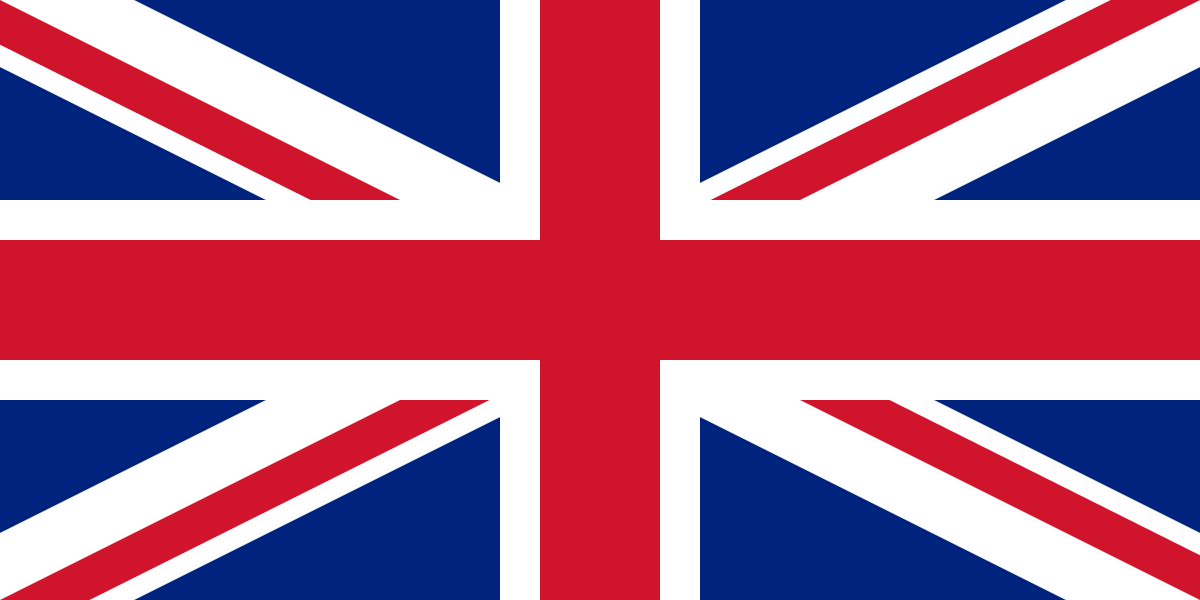

In [10]:
from urllib.parse import quote
import requests
from IPython.core.display import SVG, display

image_file = basic_info(normalize)["国旗画像"]
url = 'https://commons.wikimedia.org/w/api.php?\
action=query&format=json&prop=imageinfo&iiprop=url&titles=File:'
url += quote(image_file)

imageinfo = requests.get(url).json()
pageid = list(imageinfo["query"]["pages"].keys())[0]
imageurl = imageinfo["query"]["pages"][pageid]["imageinfo"][0]["url"]

display(SVG(url=imageurl))